In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

In [52]:
def add_bias_column(X):
    X_shape = X.shape
    X_new = np.ones((X.shape[0], X.shape[1]+1))
    X_new[:,1:] = X
    return X_new

In [187]:
def cost_function(y, y_hat):
    return np.sum(((y - y_hat)**2))/(2*len(y))

In [188]:
def load_data_and_init_params():
    '''
    Load the Boston houses dataset and randomly initialise linear regression weights.
    '''
    print('------ Loading Boston Houses Dataset ------')
    X, y = load_boston(True)
    X = add_bias_column(X)
    features = X.shape[1]

    # Initialize w
    w = np.random.randn(features).reshape(-1,1)

    return X, y.reshape(-1,1), w

In [189]:
def sgd(w, X, y, eta = 0.001):
    
    loss_arr = []
    for i in range(1000):
        y_hat = X.dot(w)
        cost = cost_function(y, y_hat)
        loss_arr.append(cost)
        if (i%50 == 0): print("Cost:", cost)
        gradient = -((y - y_hat).T.dot(X).reshape(-1,1))/y.shape[0]
        #print(gradient)
        #print(w)
        w = w - eta*gradient
    
    y_hat = X.dot(w)
    print("Final cost:", cost_function(y, y_hat))
    print(w)
    return w, loss_arr

In [190]:
X, y, w = load_data_and_init_params()
print(X.shape, y.shape, w.shape)

------ Loading Boston Houses Dataset ------
(506, 14) (506, 1) (14, 1)


In [191]:
w_new, loss_arr = sgd(w, X, y, 0.000005)

Cost: 249337.83271
Cost: 264.108019163
Cost: 229.695825388
Cost: 205.157802167
Cost: 187.271879749
Cost: 173.937412984
Cost: 163.744403975
Cost: 155.742767366
Cost: 149.289221577
Cost: 143.945609696
Cost: 139.411306232
Cost: 135.478225011
Cost: 132.000821764
Cost: 128.87605226
Cost: 126.029946589
Cost: 123.408585624
Cost: 120.972011095
Cost: 118.69009441
Cost: 116.539716597
Cost: 114.502828549
Final cost: 112.565104671
[[-1.91216127]
 [ 1.0221795 ]
 [ 0.20585581]
 [-1.19470833]
 [-0.38632795]
 [-0.0798457 ]
 [-0.18256357]
 [ 0.13448415]
 [-0.46547632]
 [ 0.23111639]
 [-0.00813846]
 [-0.84572994]
 [ 0.0971438 ]
 [ 0.52635664]]


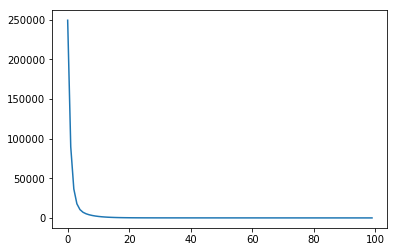

In [192]:
plt.plot(loss_arr[:100])

In [193]:
def sgd_first_order(w, X, y, eta = 0.001):
    
    eta_values = []
    loss_arr = []
    
    y_hat = X.dot(w)
    old_gradient = -((y - y_hat).T.dot(X).reshape(-1,1))/y.shape[0]
    w = w - eta*old_gradient
    
    a = 0.000000001
    eta_values.append(eta)
    for i in range(1000):
        y_hat = X.dot(w)
        cost = cost_function(y, y_hat)
        loss_arr.append(cost)
#         print(cost)
        if (i%50 == 0): print("Cost:", cost, "Eta", np.squeeze(eta))
        new_gradient = -((y - y_hat).T.dot(X).reshape(-1,1))/y.shape[0]
        
        scaled_old_gradient = (old_gradient - np.mean(old_gradient))/np.std(old_gradient)
        scaled_new_gradient = (new_gradient - np.mean(new_gradient))/np.std(new_gradient)
        
#         scaled_old_gradient = (old_gradient)/np.linalg.norm(old_gradient)
#         scaled_new_gradient = (new_gradient)/np.linalg.norm(new_gradient)
        
        dlr = -np.dot(scaled_old_gradient.T, scaled_new_gradient)
        # dlr = -np.dot(old_gradient.T, new_gradient)
        # taking cos (theta)
        
        w = w - eta* new_gradient
        eta = eta - a*dlr
        eta_values.append(eta[0,0])
#         print("eta:", eta)
        old_gradient = new_gradient
        
    y_hat = X.dot(w)
    print("Final cost:", cost_function(y, y_hat))
    print(w)
    return w,eta_values,loss_arr

In [194]:
X, y, w = load_data_and_init_params()
w_new, eta_values, loss_arr = sgd_first_order(w, X, y, 0.0000000001)

------ Loading Boston Houses Dataset ------
Cost: 343496.990435 Eta 1e-10
Cost: 1789.88708081 Eta 6.994884039440184e-07
Cost: 705.483240084 Eta 1.399442116508277e-06
Cost: 551.652087117 Eta 2.0993347455151956e-06
Cost: 478.372256104 Eta 2.7993155466506944e-06
Cost: 403.174032928 Eta 3.4993153423270873e-06
Cost: 331.828426206 Eta 4.199315154272514e-06
Cost: 269.196333294 Eta 4.899314850502694e-06
Cost: 217.560255673 Eta 5.5993143793816795e-06
Cost: 177.046257981 Eta 6.299313677258105e-06
Cost: 146.380461035 Eta 6.999312678530924e-06
Cost: 123.66047756 Eta 7.69931133925227e-06
Cost: 5662.48709229 Eta 8.067316358784546e-06
Cost: 7.32020629565e+18 Eta 7.367317188725308e-06
Cost: 4.74675066014e+26 Eta 6.667317188725298e-06
Cost: 4.91587075936e+25 Eta 5.967317188725288e-06
Cost: 4.47918673176e+13 Eta 5.2673171887252775e-06
Cost: 76.1222430436 Eta 5.033770491239861e-06
Cost: 73.377447889 Eta 5.733770046067255e-06
Cost: 70.7003950943 Eta 6.433769531488399e-06
Final cost: 68.1375926118
[[ 0.896

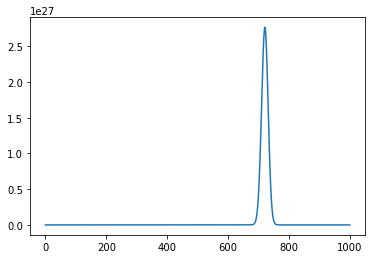

In [195]:
plt.plot(loss_arr)

In [196]:
epsilon = 0.00000000001


def sgd_finite_differences(w, X, y, eta = 0.001):
    eta_values = []
    eta_values.append(eta)
    for i in range(1000):
        y_hat = X.dot(w)
        cost = cost_function(y, y_hat)
        if (i%50 == 0): print("Cost:", cost)
        gradient = -((y - y_hat).T.dot(X).reshape(-1,1))/y.shape[0]
        old_w = w
        w = w - eta*gradient
        eta = eta - 2*epsilon*(cost_function(y,X.dot(old_w-(eta+epsilon)*gradient)) - cost_function(y,X.dot(old_w-(eta-epsilon)*gradient)) + 10000*epsilon)/(10000*epsilon+cost_function(y,X.dot(old_w-(eta+2*epsilon)*gradient))+cost_function(y,X.dot(old_w-(eta-2*epsilon)*gradient))-2*cost_function(y,X.dot(old_w-eta*gradient)))  
        eta = np.squeeze(eta)
        eta_values.append(eta)
        if (i%50 == 0):
            print("Learned LR:", eta)
    print('learned coefficients: {},{}'.format(w[0],w[1]))
    return w, eta_values

In [197]:
X, y, w = load_data_and_init_params()
w_new, eta_values, loss_arr = sgd_first_order(w, X, y, 0.00000001)

------ Loading Boston Houses Dataset ------
Cost: 112960.688277 Eta 1e-08
Cost: 443.511736044 Eta 7.093853010442068e-07
Cost: 266.880560902 Eta 1.4093222048377656e-06
Cost: 241.671193124 Eta 2.109213785647002e-06
Cost: 228.710902628 Eta 2.8091959691916914e-06
Cost: 214.821975404 Eta 3.5091955614396894e-06
Cost: 200.863725695 Eta 4.209195050881448e-06
Cost: 187.616465498 Eta 4.9091943155629594e-06
Cost: 175.519128452 Eta 5.609193339281627e-06
Cost: 164.715494849 Eta 6.309192149700166e-06
Cost: 155.146370712 Eta 7.0091908271558825e-06
Cost: 146.646641024 Eta 7.709189487670894e-06
Cost: 175.645010095 Eta 8.227309444753141e-06
Cost: 1.56507533595e+18 Eta 7.527382085092556e-06
Cost: 6.15853249877e+27 Eta 6.827382085092546e-06
Cost: 9.5413113892e+28 Eta 6.127382085092536e-06
Cost: 5.34897556898e+19 Eta 5.427382085092526e-06
Cost: 117.496587932 Eta 4.775350754928459e-06
Cost: 114.895529971 Eta 5.4734286773098325e-06
Cost: 112.102955575 Eta 6.173428536963452e-06
Final cost: 109.154601093
[[ 2.

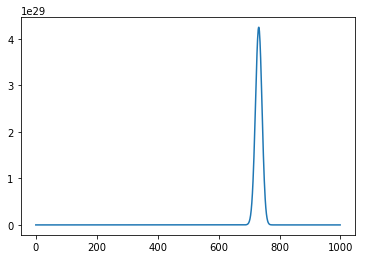

In [198]:
plt.plot(loss_arr)

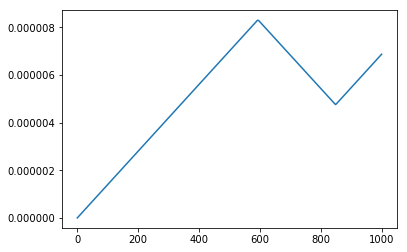

In [199]:
plt.plot(eta_values)